**СБОРНЫЙ ПРОЕКТ**

**Описание проекта**
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


Для начала импортируем необходимые библиотеки для работы с данными, построения графиков и статистическх тестов и обработки ошибок.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
import warnings
warnings.simplefilter('ignore')

Загружаем исходный файл с данными

In [2]:
games = pd.read_csv('/datasets/games.csv')

In [3]:
display(games.head(10)) # посмотрим первые 10 строк датасета

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
games.info() # посмотрим информацию о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Предобработка данных

Обращаем внимание на:

        1) несоответсвие регистров букв в наименовании столбцов
        2) наличие пропусков в столбцах name, year_of_release, genre, critic_score, user_score, rating
        3) несоответсвие типов данных year_of_release(float64), user_score(object)
        
Приступаем к правке датасета.

**Заменяем названия столбцов, приводим названия к нижнему регистру.**

In [5]:
games.columns = games.columns.str.lower()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать.

**Проверяем датасет на наличие явных дубликатов.** 

In [6]:
print('количество явных дубликатов в датасете --->', games.duplicated().sum())

количество явных дубликатов в датасете ---> 0


**Проверяем данные на наличие пропусков. В пяти столбцах есть пропуски.**

In [7]:
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [8]:
print('Процентные доли пропусков по столбцам')
(games.isna().sum() * 100 / games.index.size).round(2)

Процентные доли пропусков по столбцам


name                0.01
platform            0.00
year_of_release     1.61
genre               0.01
na_sales            0.00
eu_sales            0.00
jp_sales            0.00
other_sales         0.00
critic_score       51.32
user_score         40.09
rating             40.48
dtype: float64

**Удаляем строки с пропуском в поле name, не имеет смысла анализировать неизвестно что. Это были те же строки где были пропуски по столбцу  genre.**

In [9]:
games = games.dropna(subset = ['name'])
games.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Попытаемся решить проблему с пропусками в year_of_release следующим образом:

**Заменим пустое значение года релиза на среднее значение года релиза по каждой конкретной игре.**

Для наглядного примера возьмем например игру 'LEGO Batman: The Videogame', где видим пустые значения года релиза для платформ Wii и PSP, когда для других платформ год релиза 2008.
        

In [10]:
pd.options.display.max_rows = None
display(games[(games['name'] == 'LEGO Batman: The Videogame')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,NaN,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Делаем данную обработку и видим, пропуски уменьшились почти на половину

In [11]:
before = games.year_of_release.isnull().sum()

games['year_of_release'] = games.groupby('name')['year_of_release']\
                                .transform(lambda x:x.fillna(x.mean()))

print('Пропуски в year_of_release после обработки -->', games.year_of_release.isnull().sum(),\
      'Пропуски до обработки -->', before)

Пропуски в year_of_release после обработки --> 146 Пропуски до обработки --> 269


Проверяем как сработала обработка на примере с игрой 'LEGO Batman: The Videogame'

In [12]:
pd.options.display.max_rows = None
display(games[(games['name'] == 'LEGO Batman: The Videogame')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
397,LEGO Batman: The Videogame,X360,2008.0,Action,2.04,1.02,0.0,0.32,76.0,7.9,E10+
456,LEGO Batman: The Videogame,Wii,2008.0,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.0,0.29,72.0,8,E10+
1519,LEGO Batman: The Videogame,PS3,2008.0,Action,0.72,0.39,0.0,0.19,75.0,7.7,E10+
1538,LEGO Batman: The Videogame,PSP,2008.0,Action,0.57,0.44,0.0,0.27,73.0,7.4,E10+
1553,LEGO Batman: The Videogame,PS2,2008.0,Action,0.72,0.03,0.0,0.52,77.0,8.9,E10+
12465,LEGO Batman: The Videogame,PC,2008.0,Action,0.02,0.03,0.0,0.01,80.0,7.8,E10+


Строки с оставшимися пропусками по year_of_release удаляю. Количество их незначительно и на проведение иссследования нея должно повлиять. 

In [13]:
games = games.dropna(subset = ['year_of_release'])
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8492
user_score         6633
rating             6699
dtype: int64

- **Меняем тип столбца year_of_release на целое число (int)**, так как значение представляют дату в виде года без месяца и числа и при замене на тип "дата" у нас будет лишняя пустая информация в виде year-01-01.

In [14]:
games.year_of_release = games.year_of_release.astype('int')

Используем ту же идею как в решении проблемы с пропусками в year_of_release для пропусков в critic_score:

Заменим пустое значение critic_score на медианное значение critic_score по каждой конкретной игре. Для наглядного примера возьмем например игру 'Zumba Fitness', где видим пустые значения critic_score для платформ Wii и PS3, когда для платформы X360 critic_score = 42.
        

In [15]:
display(games[(games['name'] == 'Zumba Fitness')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,NaN,3.8,E


In [16]:
games['critic_score'] = games.groupby('name')['critic_score'].transform(lambda x:x.fillna(x.median()))

In [17]:
display(games[(games['name'] == 'Zumba Fitness')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,42.0,3.8,E


Используем тот же подход для решения проблем пропусков в user_score. Но в этом случае есть проблема с нечисловыми  значениеями в столбце, конкретоно это значение tbd, которое не случайно, так как встречается множество раз и обозначает TBD — (to be determined), проще говоря должен быть определен, но в данный момент не определен и поэтому его смело можно заменить на пустые значения Nan, чтобы потом обработать и привести данные к нужному типу.

In [18]:
display(games[games['user_score'] == 'tbd'].head(10))
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.NaN 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.00,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E
1048,Imagine: Teacher,DS,2008,Simulation,0.70,0.82,0.00,0.19,NaN,tbd,E


Проверяем отсутствие аббревиатуры tbd после обработки

In [19]:
display(games[games['user_score'] == 'tbd'])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Заменим пустое значение user_score на медианное значение user_score по каждой конкретной игре.**

Для наглядного примера возьмем например игру 'Zumba Fitness'.

In [20]:
games['user_score'] = games.groupby('name')['user_score'].transform(lambda x:x.fillna(x.median()))

In [21]:
display(games[(games['name'] == 'Zumba Fitness')])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,42.0,4.65,E
669,Zumba Fitness,X360,2010,Sports,1.74,0.45,0.0,0.18,42.0,5.5,E
3516,Zumba Fitness,PS3,2010,Sports,0.28,0.21,0.0,0.08,42.0,3.8,E


- **Меняем тип данных user_score на float**

In [22]:
games.user_score = games.user_score.astype('float')

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16567 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16567 non-null  object 
 1   platform         16567 non-null  object 
 2   year_of_release  16567 non-null  int64  
 3   genre            16567 non-null  object 
 4   na_sales         16567 non-null  float64
 5   eu_sales         16567 non-null  float64
 6   jp_sales         16567 non-null  float64
 7   other_sales      16567 non-null  float64
 8   critic_score     9035 non-null   float64
 9   user_score       8639 non-null   float64
 10  rating           9868 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


In [24]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7532
user_score         7928
rating             6699
dtype: int64

Количество пропусков уменьшилось, но они остались. Предлагаю оставшиеся пропуски в critic_score, user_score и rating оставить не заполненными, чтобы не искажать распределение и дальнейший анализ.

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales.

In [25]:
games['total_sales'] =  games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
display(games.head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31


### Иccледовательский анализ данных

Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

In [26]:
games_years = pd.pivot_table(games, index='year_of_release', values='name', aggfunc='count')
games_years.columns = ['games']
games_years

,games
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


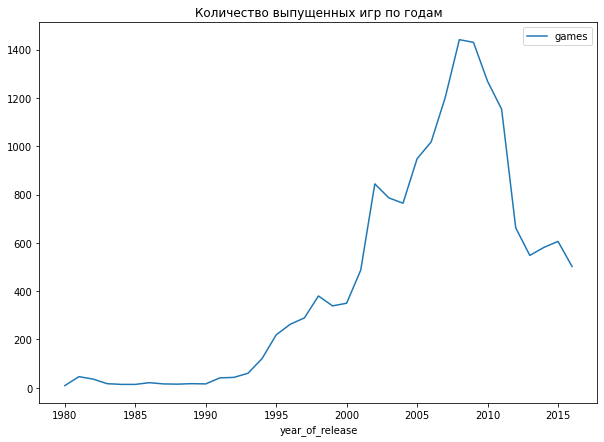

In [27]:
games_years.plot(figsize=(10,7), title='Количество выпущенных игр по годам');

Из графика видно что рост числа появления новых игр начинается приблизительно с 1994 года, где резко число новых игр выросло в 2 раза. С 2008 года последние 8 лет производство игр падает.  Поэтому период с 1980 до 1994 года можно считать не интересным с точки зрения нашего исследования. Сделаем срез исходного датасета под году релиза с 1994 по 2016.

In [28]:
games = games.query("1994 <= year_of_release <= 2016")

Посмотрим, как менялись продажи по платформам. За какой характерный срок появляются новые и исчезают старые платформы?Для этого:

      Выберем платформы с наибольшими суммарными продажами и построим распределение по годам.

In [29]:
#формируем сводную таблицу по индексу 'platform' и значениям 'total_sales' агрегированным по сумме
sales_sum_by_platform = pd.pivot_table(games, index='platform', values='total_sales', aggfunc='sum')\
                        .sort_values(['total_sales'],ascending=False)

sales_sum_by_platform

,total_sales
platform,
PS2,1247.16
X360,966.61
PS3,935.19
Wii,903.31
DS,804.26
PS,727.58
PS4,314.14
GBA,313.73
PSP,293.57


Строим барплот для наглядности и видим самые большие продажи по платформам.

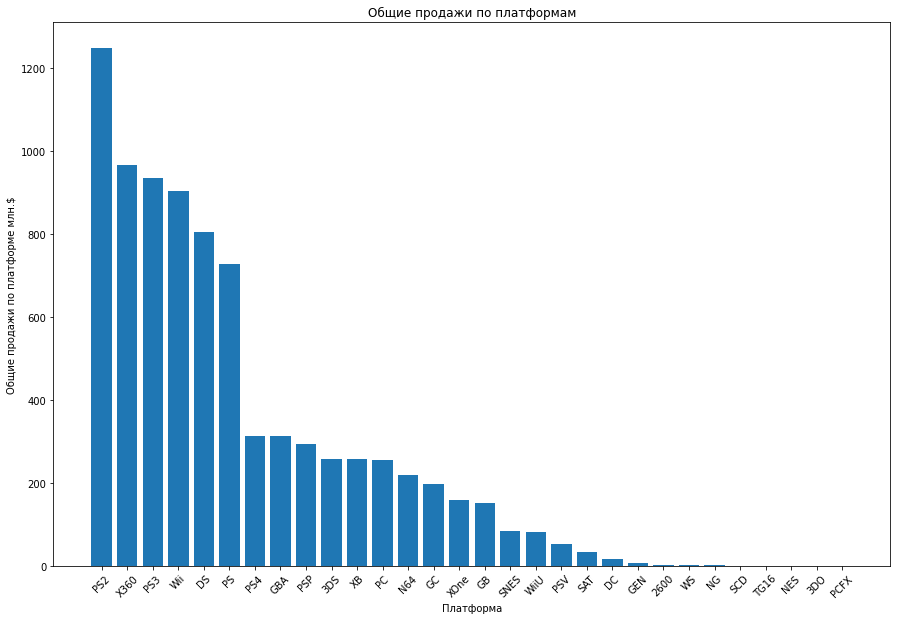

In [30]:
plt.figure(figsize=(15,10))
plt.bar(sales_sum_by_platform.index, sales_sum_by_platform['total_sales'])
plt.xticks(rotation = 45)
plt.title('Общие продажи по платформам')
plt.xlabel("Платформа");
plt.ylabel("Общие продажи по платформе млн.$");

In [31]:
top_platforms = list(sales_sum_by_platform.index[:6])
print('ТОП6 платформ с наибольшими общими продажами --->', top_platforms)

ТОП6 платформ с наибольшими общими продажами ---> ['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


Сделаем сводную таблицу по годовым продажам самых продаваемых платформ из ТОП6

In [32]:
sales_by_platform = pd.pivot_table(games, index=['platform','year_of_release'], values='total_sales', aggfunc='sum')\
                    .query('platform in @top_platforms')\
                    .sort_values(['platform','year_of_release','total_sales'],ascending=False) 
                   
sales_by_platform.columns = ['year_total_sales']
sales_by_platform

year_total_sales
platform year_of_release                  
X360     2016                         1.52
         2015                        11.96
         2014                        34.74
         2013                        88.58
         2012                       100.72
         2011                       145.23
         2010                       170.55
         2009                       120.82
         2008                       136.07
         2007                        95.41
         2006                        51.79
         2005                         9.22
Wii      2016                         0.18
         2015                         1.14
         2014                         3.75
         2013                         8.59
         2012                        22.94
         2011                        59.79
         2010                       128.67
         2009                       206.97
         2008                       177.68
         2007                       153.41
         2006                       140.19
PS3      2016                         3.60
         2015                        16.82
         2014                        47.76
         2013                       113.25
         2012                       108.28
         2011                       157.98
         2010                       142.96
         2009                       130.93
         2008                       118.79
         2007                        73.19
         2006                        20.96
         2005                         0.19
         2001                         0.48
PS2      2011                         0.45
         2010                         5.64
         2009                        26.40
         2008                        53.90
         2007                        76.10
         2006                       103.99
         2005                       160.91
         2004                       211.81
         2003                       194.00
         2002                       208.36
         2001                       166.43
         2000                        39.17
PS       2003                         2.07
         2002                         6.67
         2001                        35.59
         2000                        96.37
         1999                       144.53
         1998                       169.49
         1997                       136.17
         1996                        94.70
         1995                        35.96
         1994                         6.03
DS       2013                         1.54
         2012                        11.67
         2011                        26.33
         2010                        85.35
         2009                       119.56
         2008                       145.36
         2007                       147.23
         2006                       119.81
         2005                       130.14
         2004                        17.27

Строим барплоты для наглядности

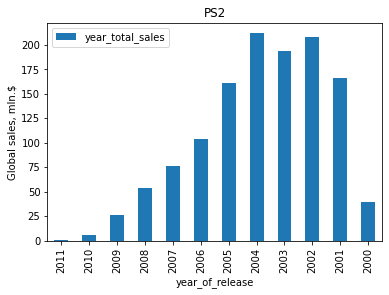

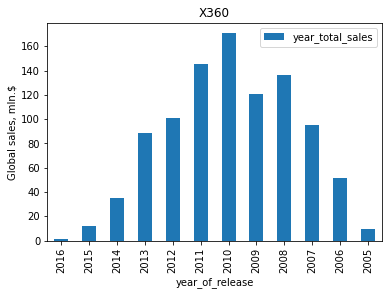

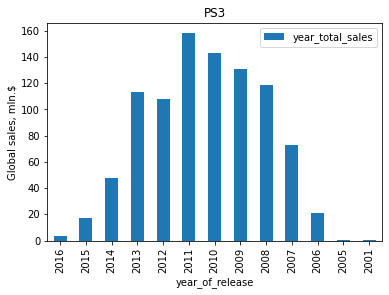

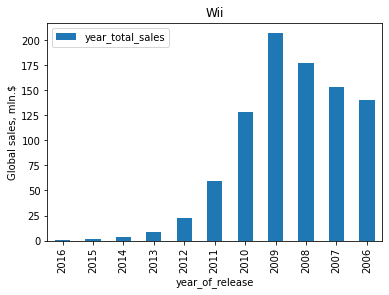

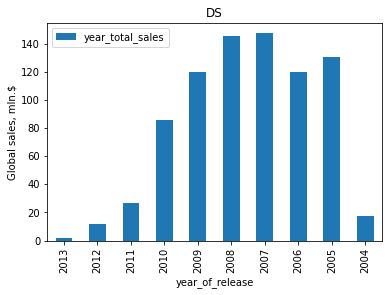

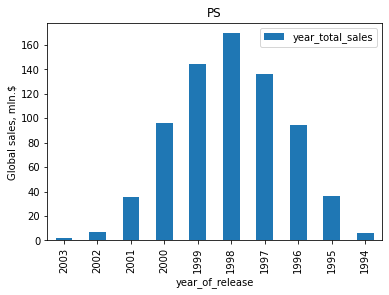

In [33]:
for platform in top_platforms:
    sales_by_platform.loc[platform].plot.bar()
    plt.title(platform)
    plt.ylabel('Global sales, mln.$')

**PS2**
Резкий скачок продаж наблюдается с 2001 и период высоких продаж длится с 2001 по 2005 год (5лет) с максимумом в 2004, после чего продажи постепенно падают. 

**X360**
Рост продаж с релиза в 2005г.Период высоких продаж длится с 2007 по 2013 год (6лет) с максимумом в 2010, после чего продажи постепенно падают до минимума в 2016.

**PS3**
Кратный рост продаж с 2007,с 2008 года продажи растут одинаково до пика в 2011 году, после чего резко падают в 2012 остаются почти на том же уровне в 2013 и потом резко падают до минимумов в 20016.Период высоких продаж длится с 2008 по 2013 год (5лет).

**Wii**
Отличный старт в  2006 год релиза с постепенным ростом. Период высоких продаж длится с 2006 по 2010 год (5лет) с максимумом в 2009, после чего продажи резко падают.

**DS**
Резкий скачок продаж в 2005 году после релиза и период стабильно высоких продаж длится с 2005 по 2010 год (6лет) с максимумом в 2007. С 2011 кратное падение продаж до финала жизни платформы в 2013 году.

**PS**
Иммет стабильно постепенный рост с 1994 до максимума в 1998 г и затем такой же стабильный спад. Наиболее высокие продажи 1996-2000 года (5лет)


Посмотрим на линейном графике продаж наиболее продаваемых платформ среднее время появления консолей нового поколения.Получается в среднем 5-6 лет: 

    РS-1994;
    потом PS2-2000;
    DS - 2004,Wii,X360,PS3 -2005

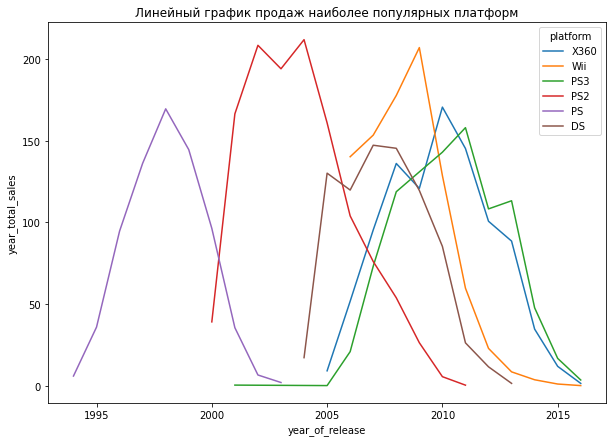

In [34]:
plt.figure(figsize=(10,7))
plt.title('Линейный график продаж наиболее популярных платформ')
sns.lineplot(x='year_of_release',y='year_total_sales', hue='platform', data=sales_by_platform.reset_index());

Посмотрим сколько в среднем "живут" наиболее продаваемые платформы из ТОП6 и все остальные платформы.

In [35]:
platform_time = pd.pivot_table(games, index=['platform'], values='year_of_release', aggfunc={'year_of_release':[max,min]})\
                .query('platform in @top_platforms')
platform_time.columns = 'finish','start'
platform_time['platform_life'] = platform_time['finish'] - platform_time['start']
platform_time.sort_values(['platform_life'],ascending=False)



,finish,start,platform_life
platform,,,
PS3,2016,2001,15
PS2,2011,2000,11
X360,2016,2005,11
Wii,2016,2006,10
DS,2013,2004,9
PS,2003,1994,9


In [36]:
print('Среднее время "жизни" наиболее продаваемых платформ --->', platform_time.platform_life.mean())

Среднее время "жизни" наиболее продаваемых платформ ---> 10.833333333333334


In [37]:
platform_time = pd.pivot_table(games, index=['platform'], values='year_of_release', aggfunc={'year_of_release':[max,min]})\
                .query('platform not in @top_platforms')
platform_time.columns = 'finish','start'
platform_time['platform_life'] = platform_time['finish'] - platform_time['start']
platform_time.sort_values(['platform_life'],ascending=False)

,finish,start,platform_life
platform,,,
PC,2016,1994,22
3DS,2016,2003,13
PSP,2015,2004,11
DC,2008,1998,10
XB,2008,2000,8
N64,2004,1996,8
GB,2001,1994,7
GBA,2007,2000,7
GC,2007,2001,6


In [38]:
print('Среднее время "жизни" платформ не из ТОП6 --->', platform_time.platform_life.mean())

Среднее время "жизни" платформ не из ТОП6 ---> 5.083333333333333


•	Чтобы построить прогноза о будущем определим актуальный период для исследования.
В результате исследования предыдущих вопросов взял актуальный период 6 лет, так как думаю в этом периоде можно увидеть реальную динамику роста новых и угасания старых платформ, пики и падения продаж, появившиеся новые платформы

In [39]:
actual_period = games[games['year_of_release'] > 2010]
actual_period.info()
actual_period.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4052 entries, 16 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4052 non-null   object 
 1   platform         4052 non-null   object 
 2   year_of_release  4052 non-null   int64  
 3   genre            4052 non-null   object 
 4   na_sales         4052 non-null   float64
 5   eu_sales         4052 non-null   float64
 6   jp_sales         4052 non-null   float64
 7   other_sales      4052 non-null   float64
 8   critic_score     2265 non-null   float64
 9   user_score       2341 non-null   float64
 10  rating           2335 non-null   object 
 11  total_sales      4052 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 411.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60


•	Посмотрим какие платформы лидируют по продажам, растут или падают и выберем несколько потенциально прибыльных платформ. Создадим сводную таблицу с годовыми продажами по каждой платформе и по обновлениям каждой платформы. Построим линейный график на основе этой таблицы.

In [40]:
sales_by_platform = pd.pivot_table(actual_period, index=['platform','year_of_release'], values='total_sales', aggfunc='sum')\
                      .sort_values(['platform','year_of_release','total_sales'],ascending=False)
                      #.query('platform in @top_platforms')\
                  
sales_by_platform.columns = ['year_total_sales']
sales_by_platform

year_total_sales
platform year_of_release                  
XOne     2016                        26.15
         2015                        60.14
         2014                        54.07
         2013                        18.96
X360     2016                         1.52
         2015                        11.96
         2014                        34.74
         2013                        88.58
         2012                       100.72
         2011                       145.23
WiiU     2016                         4.60
         2015                        16.35
         2014                        22.03
         2013                        21.65
         2012                        17.56
Wii      2016                         0.18
         2015                         1.14
         2014                         3.75
         2013                         8.59
         2012                        22.94
         2011                        59.79
PSV      2016                         4.25
         2015                         6.25
         2014                        11.90
         2013                        10.59
         2012                        16.19
         2011                         4.63
PSP      2015                         0.12
         2014                         0.24
         2013                         3.38
         2012                         7.95
         2011                        17.82
PS4      2016                        69.25
         2015                       118.90
         2014                       100.00
         2013                        25.99
PS3      2016                         3.60
         2015                        16.82
         2014                        47.76
         2013                       113.25
         2012                       108.28
         2011                       157.98
PS2      2011                         0.45
PC       2016                         5.25
         2015                         8.52
         2014                        13.28
         2013                        13.01
         2012                        23.45
         2011                        35.16
DS       2013                         1.54
         2012                        11.67
         2011                        26.33
3DS      2016                        15.14
         2015                        27.78
         2014                        43.76
         2013                        56.57
         2012                        51.76
         2011                        63.20

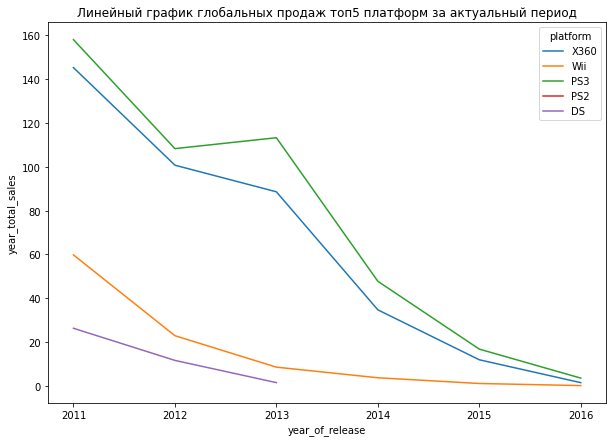

In [41]:
plt.figure(figsize=(10,7))
plt.title('Линейный график глобальных продаж топ5 платформ за актуальный период')
sns.lineplot(x='year_of_release',y='year_total_sales', hue='platform', data=sales_by_platform.query('platform in @top_platforms').reset_index());

Почти у всех существующих платформ продажи упали к концу актуального периода (2016год).
Продажи на консолях PS3, X360, Wii в 2016м снизились до минимума.Данные платформы уже не прибыльны.
Лидер продаж PS4, хотя продажи падают, но всё равно платформа прибыльная, также как и XOne несмотря на то, что  у Xone продажи в 2016м упали более чем в 2 раза чем в 2016. Далее по выручке в 2016м году  следует 3DS.

•	Посмотрим на глобальные продажи по платформам за актуальный период.

In [42]:
sales_sum_by_platform = pd.pivot_table(actual_period, index='platform', values='total_sales', aggfunc='sum')\
                        .sort_values(['total_sales'],ascending=False)

sales_sum_by_platform

,total_sales
platform,
PS3,447.69
X360,382.75
PS4,314.14
3DS,258.21
XOne,159.32
PC,98.67
Wii,96.39
WiiU,82.19
PSV,53.81


In [43]:
top_platforms = list(sales_sum_by_platform.index[:5])
print('Топ 5 платформ по глобальным продажам:', top_platforms)

Топ 5 платформ по глобальным продажам: ['PS3', 'X360', 'PS4', '3DS', 'XOne']


•	Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. 

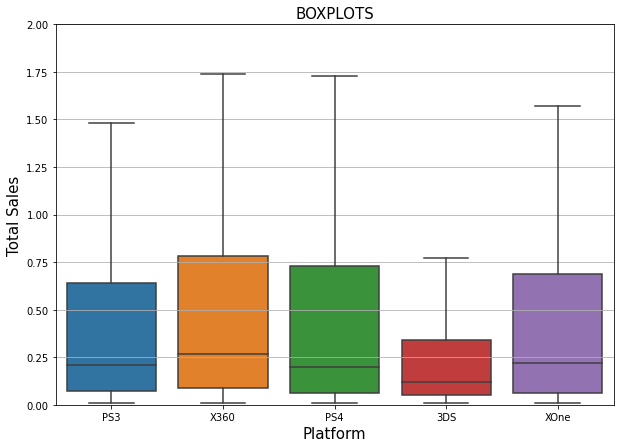

In [44]:
plt.figure(figsize=(10,7))
plt.ylim(0,2)
plt.grid(True)
plt.title('BOXPLOTS', fontsize=15)
sns.boxplot(data=actual_period.query('platform in @top_platforms'), x='platform',y='total_sales',showfliers=False)
plt.xlabel('Platform', fontsize=15)
plt.ylabel('Total Sales',fontsize=15);

Виды наблюдений, которые можно сделать на основе данного "ящика с усами":

Каковы ключевые значения: медианное значение общих продаж наибольше всего по платформе Х360 составляет чуть больше 0,25 млн.Наименньшая медиана значений общих продаж у D3S чуть меньше 0,125 млн. У платформ PS3,PS4 и XOne медианы приблизительно на одном уровнев пределах 0,2-0,25млн. 

Существуют ли выбросы: для всех платформ существуют выбросы данных

Симметричны ли данные:данные не симметричны. Для всех платформ наибольшее число значений в диапазоне больше медианы.

Насколько плотно сгруппированы данные и смещены ли они: Большая часть значений общих продаж у X360 и PS4 лежит в диапазоне чуть больше 0,75 млн. У платформы XOne в пределах приблизительно 0,7 млн., у платформы PS3 в пределах до 0,65 млн., у платформы 3DS в пределах до 0,3 млн.Границы платформ высокие,наибольшие у X360 и PS4 около 1,75 млн., наименьшая у 3DS чуть больше 0,75.


•	Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируйте выводы.

**Матрицы корреляции между отзывами пользователей и критиков и глобальными продажами**

In [45]:
for platform in top_platforms:
    pltf = actual_period[actual_period['platform'] == platform]
    pltf = pltf.loc[:,['critic_score', 'user_score','total_sales']]
    print(f'Матрица корреляции для платформы {platform}')
    print(pltf.corr())

Матрица корреляции для платформы PS3
              critic_score  user_score  total_sales
critic_score      1.000000    0.454965     0.348257
user_score        0.454965    1.000000     0.027180
total_sales       0.348257    0.027180     1.000000
Матрица корреляции для платформы X360
              critic_score  user_score  total_sales
critic_score      1.000000    0.442601     0.360849
user_score        0.442601    1.000000     0.046485
total_sales       0.360849    0.046485     1.000000
Матрица корреляции для платформы PS4
              critic_score  user_score  total_sales
critic_score      1.000000    0.570418     0.390890
user_score        0.570418    1.000000    -0.020862
total_sales       0.390890   -0.020862     1.000000
Матрица корреляции для платформы 3DS
              critic_score  user_score  total_sales
critic_score      1.000000    0.635983     0.320648
user_score        0.635983    1.000000     0.232203
total_sales       0.320648    0.232203     1.000000
Матрица корреляции 

**Визуализация матрицы корреляции с помощью Heatmap и диаграмм рассеивания.** 

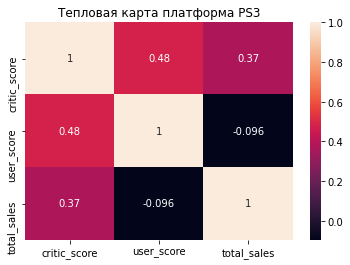

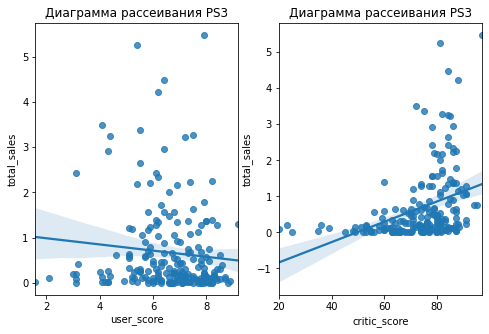

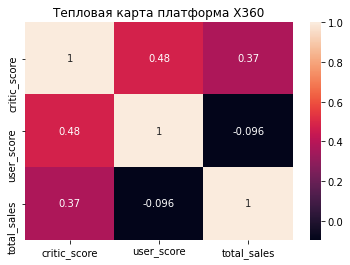

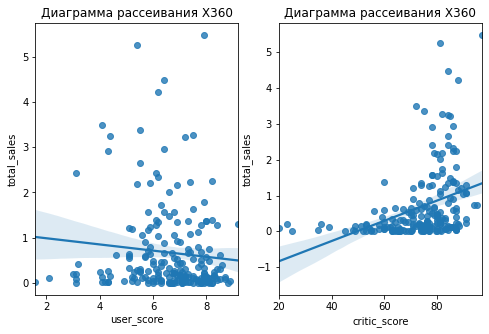

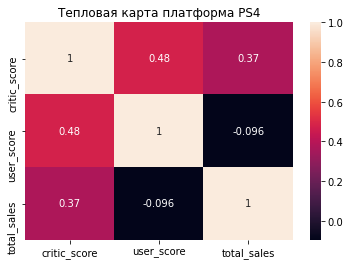

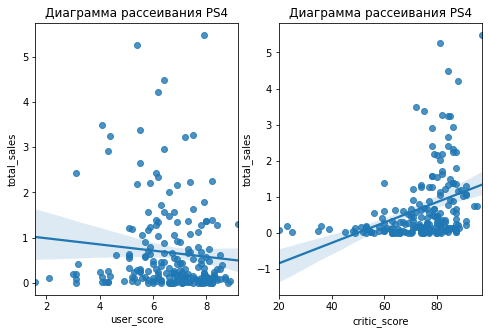

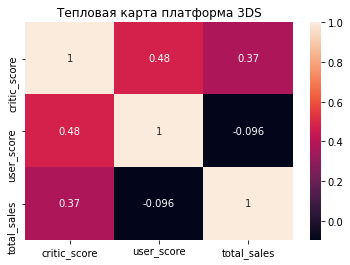

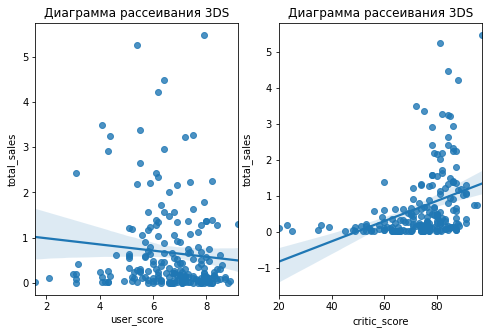

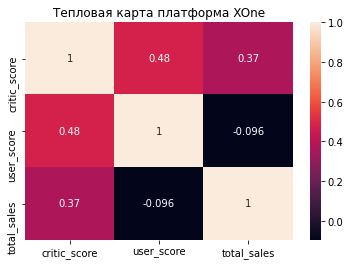

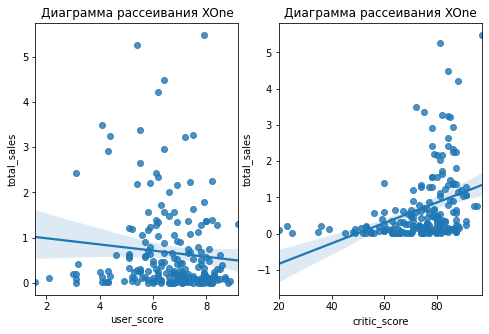

In [46]:
for platform in top_platforms:
    plt.title(f'Тепловая карта платформa {platform}')
    sns.heatmap(pltf.corr(), annot = True)
    
    plt.figure(figsize=(8,5))
    plt.subplot(1 ,2, 1)
    plt.title(f'Диаграмма рассеивания {platform}')
    sns.regplot(x='user_score', y='total_sales', data=pltf)
    plt.subplot(1 ,2, 2)
    plt.title(f'Диаграмма рассеивания {platform}')
    sns.regplot(x='critic_score', y='total_sales', data=pltf);      

**Вывод**

Зависимость общих продаж по платформам от оценки критиков и пользователей существует,носит линейный характер, но она очень слабая. 

Судя по графикам можно так же сказать, что общие продажи больше зависят от рейтинга критиков, чем от рейтинга пользователей, так как корреляция общих продаж и рейтинга критиков по всем платформам в этом случае выше.

По платформе XOne и PS4 вообще наблюдается что чем выше оценка пользователей тем меньше продажи, тогда как корреляция с оценкой критиков составляет 39% для PS4 и 37% для XOne.

•	Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [47]:
sales_sum_mean_median_by_genre = pd.pivot_table(actual_period, index='genre', values='total_sales', aggfunc ={'total_sales':['sum','mean','median']})\
                       .sort_values(['sum','mean','median'],ascending=False)

games_by_genre = pd.pivot_table(actual_period, index='genre', values='name', aggfunc='count')\
                        .sort_values(['name'],ascending=False)
games_by_genre.columns = ['count_games']

genre_merged=sales_sum_mean_median_by_genre.merge(games_by_genre, on='genre', how ='inner')
genre_merged

,mean,median,sum,count_games
genre,,,,
Action,0.439176,0.130,565.22,1287
Shooter,1.213735,0.410,402.96,332
Role-Playing,0.528237,0.150,245.63,465
Sports,0.608718,0.200,237.40,390
Misc,0.366257,0.120,139.91,382
Platform,0.726885,0.185,88.68,122
Racing,0.490611,0.160,88.31,180
Fighting,0.420755,0.180,66.90,159
Simulation,0.369559,0.110,50.26,136


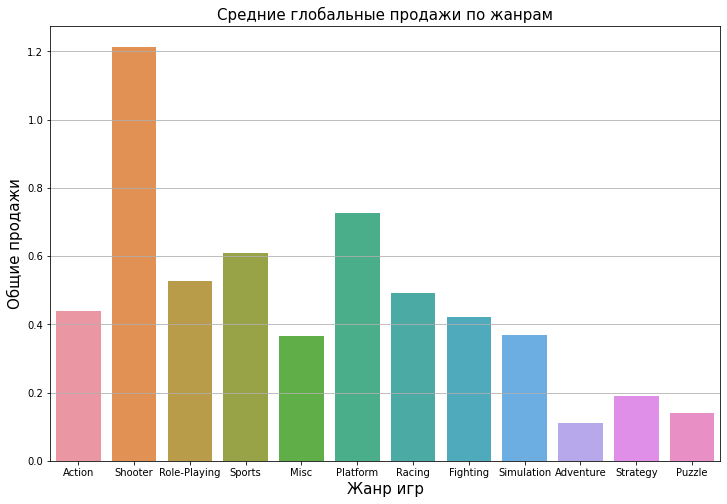

In [48]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.title('Средние глобальные продажи по жанрам', fontsize=15)
sns.barplot(x='genre',y='mean', data=genre_merged.reset_index())
plt.xlabel('Жанр игр', fontsize=15)
plt.ylabel('Общие продажи',fontsize=15);

In [49]:
top_genre = list(genre_merged.sort_values(by='mean', ascending=False).index[:5])
print('Топ 5 платформ по средним продажам:', top_genre)

Топ 5 платформ по средним продажам: ['Shooter', 'Platform', 'Sports', 'Role-Playing', 'Racing']


**Вывод**

Топ 5 платформ по средним продажам: ['Shooter', 'Platform', 'Sports', 'Role-Playing', 'Racing']

Выделяются не популярные жанры, как Adventure со средними продажами в 12 раз меньше чем Shooter, а так же жанры Puzzle,Strategy выглядят не популярными на фоне пятерки лидеров.

В разрезе игры каждая игра в жанре Shooter приносит в среднем в 4 раза больше выручки, чем игра в жанре Action (1.21 млн. против 0,44 млн.).Но из-за того что игр в жанре Action больше в 4 раза (1287 против 332) общие продажи жанра Action в сумме больше.
Наиболее прибыльные жанры по глобальным продажам:Action 565.22,Shooter 402.96,Role-Playing 245.63, Sports 237.4



**Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):**


•	Самые популярные платформы (топ-5). Опишите различия в долях продаж.

In [50]:
sales_by_market = actual_period.groupby(['platform']).agg(na_sales=('na_sales', 'sum'),\
                                                          jp_sales=('jp_sales', 'sum'),\
                                                          eu_sales=('eu_sales', 'sum')).reset_index()
sales_by_market

,platform,na_sales,jp_sales,eu_sales
0,3DS,82.83,100.62,61.46
1,DS,19.33,8.04,9.50
2,PC,30.08,0.00,57.38
3,PS2,0.13,0.09,0.13
4,PS3,168.96,49.40,164.15
5,PS4,108.74,15.96,141.09
6,PSP,2.29,24.28,1.87
7,PSV,12.47,21.84,13.07
8,Wii,49.36,8.97,30.04
9,WiiU,38.10,13.01,25.13


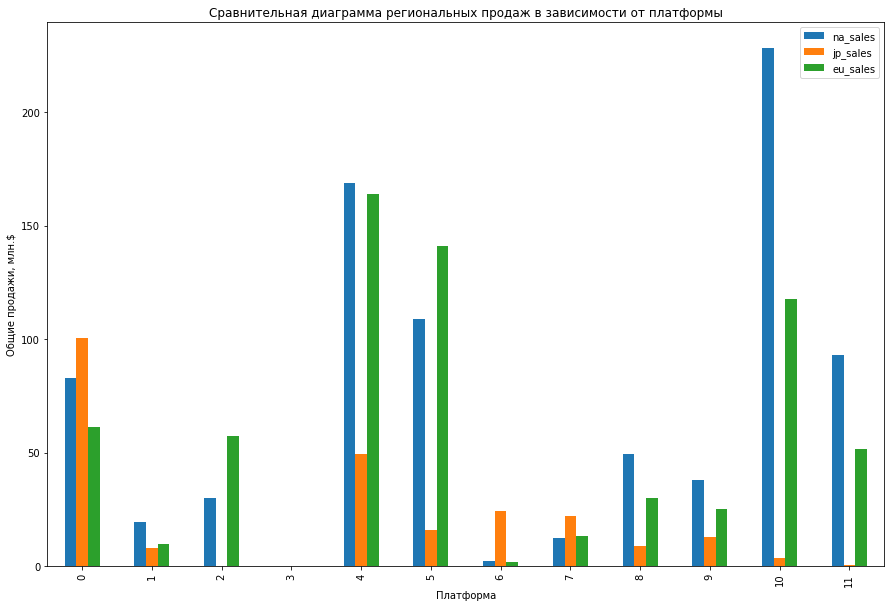

In [51]:
sales_by_market.plot.bar(figsize=(15,10),xlabel='Платформа',ylabel='Общие продажи, млн.$', title = 'Сравнительная диаграмма региональных продаж в зависимости от платформы');

In [52]:
sales_by_market['na_sales_%'] = ((sales_by_market['na_sales']/sales_by_market['na_sales'].sum())*100).round(decimals=2)
print('TOP5 платформ по продажам в Северной Америке:')
display(sales_by_market.set_index('platform').groupby(level=0)[['na_sales','na_sales_%']].agg(np.sum)\
                                             .sort_values(by='na_sales',ascending=False).head(5))
            



TOP5 платформ по продажам в Северной Америке:


,na_sales,na_sales_%
platform,,
X360,228.18,27.37
PS3,168.96,20.27
PS4,108.74,13.04
XOne,93.12,11.17
3DS,82.83,9.94


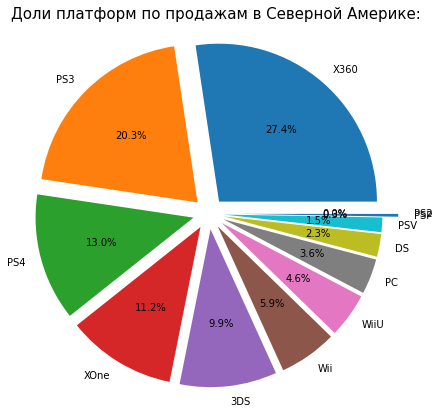

In [53]:
sales_by_market = sales_by_market.sort_values(['na_sales'],ascending=False)#.reset_index()
plt.figure(figsize=(7,7))
plt.title('Доли платформ по продажам в Северной Америке:', fontsize=15)
plt.pie(sales_by_market['na_sales'],labels = sales_by_market['platform'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2])
plt.axis('equal')
plt.show()

In [54]:
sales_by_market['jp_sales_%'] = ((sales_by_market['jp_sales']/sales_by_market['jp_sales'].sum())*100).round(decimals=2)
print('TOP5 платформ по продажам в Японии:')
display(sales_by_market.set_index('platform').groupby(level=0)[['jp_sales','jp_sales_%']].agg(np.sum)\
                                             .sort_values(by='jp_sales',ascending=False).head(5))
            



TOP5 платформ по продажам в Японии:


,jp_sales,jp_sales_%
platform,,
3DS,100.62,40.92
PS3,49.40,20.09
PSP,24.28,9.87
PSV,21.84,8.88
PS4,15.96,6.49


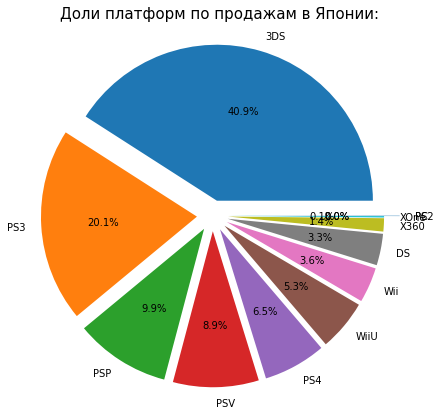

In [55]:
sales_by_market = sales_by_market.sort_values(['jp_sales'],ascending=False)#.reset_index()
plt.figure(figsize=(7,7))
plt.title('Доли платформ по продажам в Японии:', fontsize=15)
plt.pie(sales_by_market['jp_sales'],labels = sales_by_market['platform'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2])
plt.axis('equal')
plt.show()

In [56]:
sales_by_market['eu_sales_%'] = ((sales_by_market['eu_sales']/sales_by_market['eu_sales'].sum())*100).round(decimals=2)
print('TOP5 платформ по продажам в Европе:')
display(sales_by_market.set_index('platform').groupby(level=0)[['eu_sales','eu_sales_%']].agg(np.sum)\
                                             .sort_values(by='eu_sales',ascending=False).head(5))
            



TOP5 платформ по продажам в Европе:


,eu_sales,eu_sales_%
platform,,
PS3,164.15,24.38
PS4,141.09,20.96
X360,117.87,17.51
3DS,61.46,9.13
PC,57.38,8.52


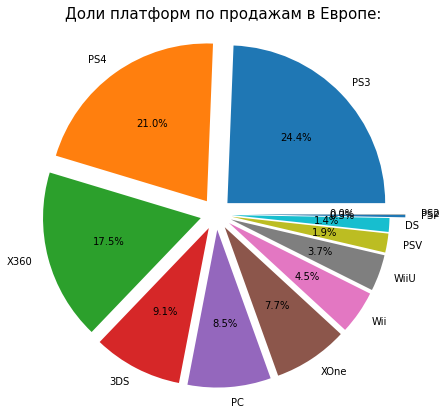

In [57]:
sales_by_market = sales_by_market.sort_values(['eu_sales'],ascending=False)
plt.figure(figsize=(7,7))
plt.title('Доли платформ по продажам в Европе:', fontsize=15)
plt.pie(sales_by_market['eu_sales'],labels = sales_by_market['platform'],autopct = '%1.1f%%',explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.2,0.2])
plt.axis('equal')
plt.show()

#### Вывод

- В Северной Америке пользователи предпочитают больше всего игры на платформе X360 -27.37% и
PS3	-20.27%.  
- В Японии наиболее популярна платформа 3DS -40.92%.
- В Европе PS3 -24.38% и PS4	-20.96.

### Самые популярные жанры (топ-5). Поясните разницу.

In [58]:
sales_by_genre = actual_period.groupby(['genre']).agg(na_sales=('na_sales', 'sum'),\
                                                          jp_sales=('jp_sales', 'sum'),\
                                                          eu_sales=('eu_sales', 'sum')).reset_index()
sales_by_genre

,genre,na_sales,jp_sales,eu_sales
0,Action,234.41,63.63,202.17
1,Adventure,14.76,12.07,13.96
2,Fighting,31.63,12.38,16.24
3,Misc,69.81,17.85,39.82
4,Platform,38.28,12.13,30.07
5,Puzzle,2.74,2.91,3.56
6,Racing,31.98,5.64,40.58
7,Role-Playing,83.78,79.87,62.30
8,Shooter,194.45,11.92,148.05
9,Simulation,15.37,11.64,19.72


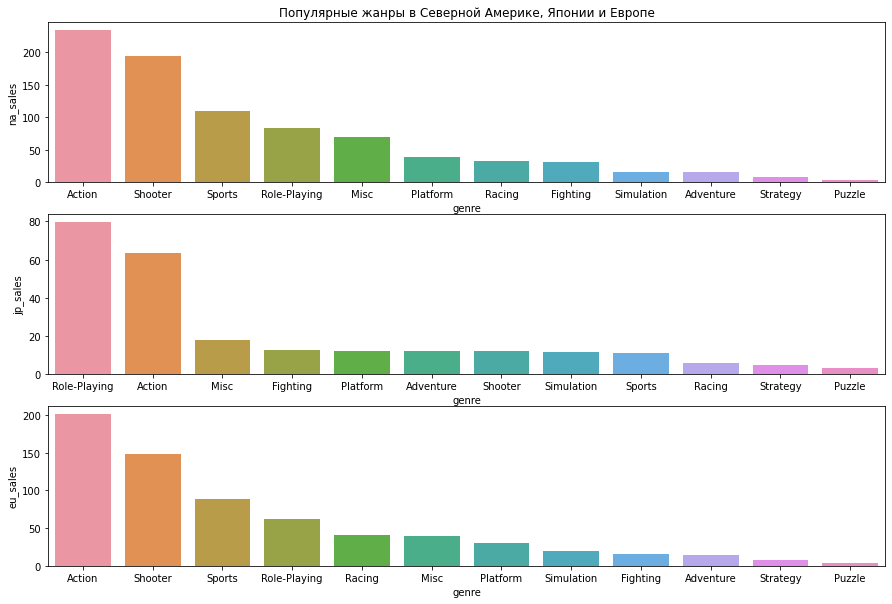

In [59]:
plt.figure(figsize=(15,10))

plt.subplot(3,1,1)
plt.title('Популярные жанры в Северной Америке, Японии и Европе')
sns.barplot(x='genre', y='na_sales', data=sales_by_genre.sort_values(['na_sales'],ascending=False).reset_index())
plt.subplot(3,1,2)
#plt.title('Популярные жанры в Японии')
sns.barplot(x='genre', y='jp_sales', data=sales_by_genre.sort_values(['jp_sales'],ascending=False).reset_index())
plt.subplot(3,1,3)
#plt.title('Популярные жанры в Европе')
sns.barplot(x='genre', y='eu_sales', data=sales_by_genre.sort_values(['eu_sales'],ascending=False));            

#### Вывод

- Жанровые предпочтения жителей Северное Америки и Европы по первой четверке жанров одинаковые,это Action,Shooter,Sports,Role-Playing. На 5 месте в Америке жанр Misc, в Европе Racing.

- В Японии Top5: Role-Playing,Action,MIsc,Fighting,Platform

### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [60]:
sales_by_rating = actual_period.groupby(['rating']).agg(na_sales=('na_sales', 'sum'),\
                                                          jp_sales=('jp_sales', 'sum'),\
                                                          eu_sales=('eu_sales', 'sum'))#.reset_index()
print('Таблица региональных продаж по рейтингу')
display(sales_by_rating)

Таблица региональных продаж по рейтингу


,na_sales,jp_sales,eu_sales
rating,,,
E,170.25,36.68,141.93
E10+,119.95,11.23,79.88
EC,0.42,0.00,0.00
M,309.32,26.15,251.40
RP,0.00,0.00,0.03
T,109.62,33.39,83.37


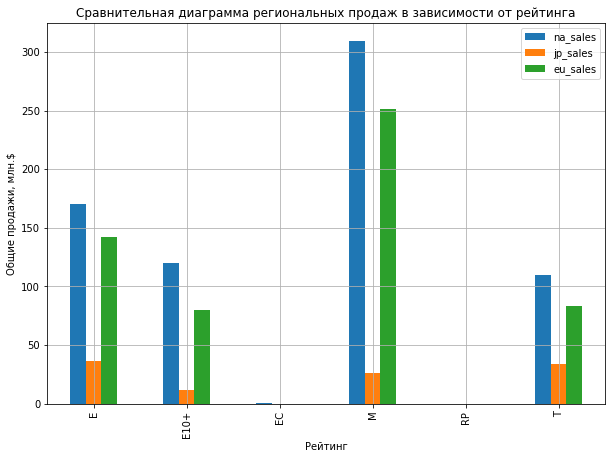

In [61]:
sales_by_rating.plot.bar(figsize=(10,7),xlabel='Рейтинг',ylabel='Общие продажи, млн.$', grid=True,title='Сравнительная диаграмма региональных продаж в зависимости от рейтинга');

#### Вывод:

- Рейтинг ESRB на продажи в отдельном регионе влияет. 
- В Северной Америке и Европе влияние жанра одинаковое, в Европе только продажи меньше чем в Америке по всем рейтингам. 
- Превая тройка рейтингов наиболее продаваемых игр в Северной Америке и Европе: М, Е, E10+
- В Японии совершенно другая картина, там топ3 рейтингов такой: E, T, М



### Проверка гипотезы

Нужно сравнивать средние двух генеральных совокупностей между собой. 

Чтобы выбрать, какой статистический тест использовать для проверки гипотез,  визуализируем распределение каждой выборки, чтобы определить нормальное у них распределение или нет. Если распределение не в форме "колокола" (не нормальное), попробуем его нормализовать логарифмическим преобразованием. Посмотрим поможет ли это данным принят более нормальное распределение.

In [62]:
#Функция для визуализации данных на нормальность распределения до и после обработки
def visual_norm_check(var1,var2):
    data = actual_period.user_score[actual_period[var1] == var2].dropna()
    data_log = np.log(data)

    fig, axs = plt.subplots(nrows= 1 , ncols= 2 )

    #создаем гистограммы
    axs[0]. hist (data, bins=50, edgecolor='black')
    axs[1]. hist (data_log, bins=50, edgecolor='black')

    axs[0].set_title(f'Оригинал {var2}')
    axs[1].set_title(f'Log-трансфорация {var2}')



### Визуальная проверка на нормальность распределения до обработки и после обработки по платформам XOne и PC

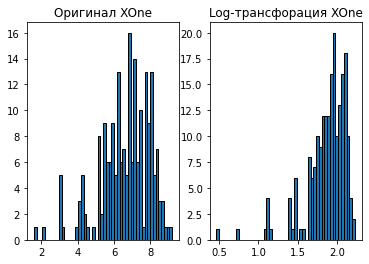

In [63]:
visual_norm_check('platform','XOne')

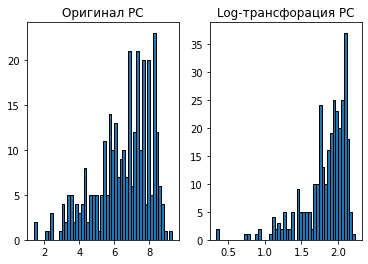

In [64]:
visual_norm_check('platform','PC')

Вывод:

Данные распределены не нормально до обработки и после.

### Визуальная проверка на нормальность распределения до обработки и после обработки по жанрам Action и Sports

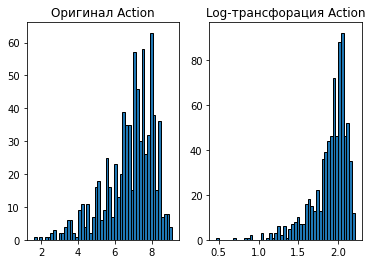

In [65]:
visual_norm_check('genre','Action')

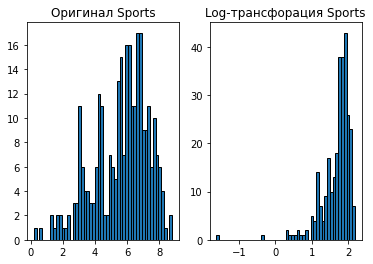

In [66]:
visual_norm_check('genre','Sports')

Вывод:

Данные распределены не нормально до обработки и после.

### Визуальные тесты показали,что выборочные данные не распределены нормально.

В этом случае не рекомендуется использовать t-test Стьюдента для проверки гипотез, а можно использовать непараметрический тест **U-тест Манна-Уитни** для проверки независимых выборок и определения того, равны ли распределения или нет. Этот тест не требует предположения о нормальности распределения данных.

Чтобы точно подтвердить нулевую гипротезу используем статистический тест.Нулевая гипотеза будет отвергнута, если вероятность получить то среднее, которое имеется в выборочных данных, слишком мала. Уровень значимости численно определяет, где проходит граница. Им задаётся вероятность попасть слишком далеко от центра распределения. Для теста установим уровень значимости 5%

Гипотезы проверяются с помощью расчёта p-value (от англ. p, probability — «вероятность», value — «значение») — вероятности при верной нулевой гипотезе получить наблюдаемое значение или более удалённое от того, которое предположили в H0. Уровень статистической значимости выбирается перед проведением статистического теста(мы его установили как 5%), а p-value — вероятность, которая вычисляется для конкретного эксперимента, то есть для уже взятой выборки.
Если p-value меньше выбранного уровня статистической значимости, то нулевая гипотеза отвергается в пользу альтернативной — такой результат ещё называется значимым. А если больше, то не отвергается.


In [67]:
from scipy.stats import mannwhitneyu

#функция для проверки гипотез
def h_check(alpha,col1,arr1,arr2):
    
    #считаем средние значения
    mean1 = actual_period.user_score[actual_period[col1] == arr1].mean()
    mean2 = actual_period.user_score[actual_period[col1] == arr2].mean()
    print(f'Средний пользовательский рейтинг: {arr1} --->', mean1,f', {arr2} --->', mean2)
    
    #считаем дисперсии выборок
    disp1 = actual_period.user_score[actual_period[col1] == arr1].var()
    disp2 = actual_period.user_score[actual_period[col1] == arr2].var()
    print(f'Дисперсия выборки:                {arr1} --->', disp1,f', {arr2} --->', disp2)
    
    m1 = actual_period.user_score[actual_period[col1] == arr1].dropna()
    m2 = actual_period.user_score[actual_period[col1] == arr2].dropna()   
   
    stat, p = mannwhitneyu(m1, m2)
    
    print('уровень статистической значимости alpha:', alpha)
    print('p-value:', p)

    if p < alpha:
        print('Отвергаем нулевую гипотезу и принимаем альтернативную')
    else:
        print('Отвергнуть нулевую гипотезу не удалось')
                            


### Проверяем - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Нулевая гипотеза:**

    Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Альтернативная гипотеза:**
    
    Средние пользовательские рейтинги платформ Xbox One и PC  не одинаковые.

In [68]:
h_check(0.05,'platform','XOne','PC')

Средний пользовательский рейтинг: XOne ---> 6.617233009708738 , PC ---> 6.4609375
Дисперсия выборки:                XOne ---> 1.8936893795879708 , PC ---> 2.5923408111285267
уровень статистической значимости alpha: 0.05
p-value: 0.5951007601963649
Отвергнуть нулевую гипотезу не удалось


В первом случае вычисление двух средних по выборкам показало, что они приблизительно равны, но чтобы точно принять нулевую гипротезу использовал статистический тест.

### Проверяем - Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спbортивные соревнования») разные

**Нулевая гипотеза:**

    Средние пользовательские рейтинги жанров Action и Sports равны.

**Альтернативная гипотеза:**
    
    Средние пользовательские рейтинги жанров Action и Sports не равны.

In [69]:
h_check(0.05,'genre','Action','Sports')

Средний пользовательский рейтинг: Action ---> 6.802560819462227 , Sports ---> 5.634775086505191
Дисперсия выборки:                Action ---> 1.8039357414885584 , Sports ---> 2.7924583693771625
уровень статистической значимости alpha: 0.05
p-value: 3.088245240409676e-27
Отвергаем нулевую гипотезу и принимаем альтернативную


Во втором случае вычисление двух средних по выборкам показало, что они не равны, но чтобы точно опровергнуть нулевую гипротезу использовал тот же самый статистический тест.

# Вывод

Для решения поставленной исследовательской задачи было проделано: 
### Предобработка данных передоставленной таблицы
        
- Заменнены названия столбцов, приведены названия к нижнему регистру.
- выявлены и обработаны по возможности и целесообразности пропуски: удалены те строки где пропуски не влияют на исследование, пропуски где это может повлиять на исследование оставлены без изменений
- исправлен тип данных
- датасет проверен на наличие явных дубликатов
        
### Были даны ответы на поставленные вопросы, комментарии даны по ходу исследования.

- Числа появления новых игр начинается приблизительно с 1994 года, где резко число новых игр выросло в 2 раза. С 2008 года последние 8 лет производство игр падает.Почти у всех существующих платформ продажи упали к концу актуального периода (2016год). Продажи на консолях PS3, X360, Wii в 2016м снизились до минимума.Данные платформы уже не прибыльны. Лидер продаж в 2016м году PS4, хотя продажи падают, но всё равно платформа прибыльная, также как и XOne несмотря на то, что у Xone продажи в 2016м упали более чем в 2 раза чем в 2015. Далее по выручке в 2016м году следует 3DS.

- **Топ 5 платформ** по глобальным продажам за последние 6 лет: **['PS3', 'X360', 'PS4', '3DS', 'XOne']**

- Самая прибыльная консоль PS4, так же она является самой популярной у пользователей всего мира, кроме Японии. Самый популрный жанр Action с рейтингом "М", и в с рейтингом "T" в Японии.

- Было выявлено, что продажи игр зависят от платформы, жанра, а также рейтинга критиков и оценки пользователей.

- Зависимость общих продаж по платформам от оценки критиков и пользователей существует,носит линейный характер, но она очень слабая. Судя по графикам можно так же сказать, что общие продажи больше зависят от рейтинга критиков, чем от рейтинга пользователей, так как корреляция общих продаж и рейтинга критиков по всем платформам в этом случае выше. По платформе XOne и PS4 вообще наблюдается что чем выше оценка пользователей тем меньше продажи, тогда как корреляция с оценкой критиков составляет 39% для PS4 и 37% для XOne.

- Наиболее прибыльные жанры по общим продажам:Action 565.22,Shooter 402.96,Role-Playing 245.63, Sports 237.4 В разрезе игры каждая игра в жанре Shooter приносит в среднем в 4 раза больше выручки, чем игра в жанре Action (1.21 млн. против 0,44 млн.).Но из-за того что игр в жанре Action больше в 4 раза (1287 против 332) общие продажи жанра Action в сумме больше.

- В Северной Америке пользователи предпочитают больше всего игры на платформе X360 -27.37% и PS3 -20.27%.В Японии наиболее популярна платформа 3DS -40.92%. В Европе PS3 -24.38% и PS4 -20.96.

- Жанровые предпочтения жителей Северное Америки и Европы по первой четверке жанров одинаковые,это Action,Shooter,Sports,Role-Playing. На 5 месте в Америке жанр Misc, в Европе Racing. В Японии Top5: Role-Playing,Action,MIsc,Fighting,Platform

- Рейтинг ESRB на продажи в отдельном регионе влияет. В Северной Америке и Европе влияние жанра одинаковое, в Европе только продажи меньше чем в Америке по всем рейтингам. Превая тройка рейтингов наиболее продаваемых игр: М, Е, E10+. Интересно, но в Японии совершенно другая картина, там топ3 рейтингов такой: E, T, М

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.
- Средние пользовательские рейтинги жанров Action и Sports не равны.


### Рекоммендации для кампании на 2017 год.

- В конце актуального периода (2016 год) продажи игра падали по всем платформам и по всем рынкам, стоит предположить, что эта тенденция сохранится и 2017, пока не появятся платформы нового поколения,что в большинстве случаев вызывает рост продаж. 
- Рост продаж могут дать игры с жанрами из топ5 по каждому рынку,рейтингу ESRB M(пользователи старше 17 лет) и высокой оценкой критиков.
